# Solve Poisson's equation

$$\nabla^2 \phi = f$$

for 

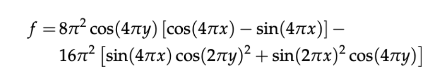

The analytical is:


$$\phi = \sin(2\pi x)^2\cos(4\pi y) + \sin(4\pi x)\cos(2\pi y)^2$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Check analytical solution:

In [2]:
# Create an XY grid

# Set number of points
Nx = 256
Ny = 256

# Min/Max values for the axes
x_min = 0.
x_max = 1.

y_min = 0.
y_max = 1.

# step sizes 
dx = (x_max - x_min)/Nx
dy = (y_max - y_min)/Ny

print(dx)
#print(dy)

# Axes:
x = np.arange(x_min, x_max, dx)
y = np.arange(y_min, y_max, dy)

print(x.shape, y.shape)

# We create the 2D domain
X, Y = np.meshgrid(x, y)

print(X.shape, Y.shape)

0.00390625
(256,) (256,)
(256, 256) (256, 256)


Create function for:


$$\phi(x, y) = \sin(2\pi x)^2\cos(4\pi y) + \sin(4\pi x)\cos(2\pi y)^2$$

In [3]:
def exact_sln(xx, yy):
    
    phi_exact = (np.sin(2*np.pi*xx)**2)*(np.cos(4*np.pi*yy)) + \
    (np.sin(4*np.pi*xx))*(np.cos(2*np.pi*yy)**2)
    
    return phi_exact 

In [4]:
# Evaluate the function using our 2D grid

Z_sln = exact_sln(X, Y)

print(Z_sln.shape)


(256, 256)


### Plotting:

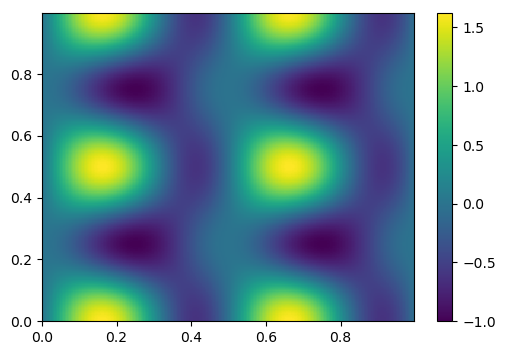

In [5]:
# Figure environment

plt.figure(figsize=(6,4))

A = plt.pcolor(X, Y, Z_sln)

plt.colorbar(A)

plt.show()

In [6]:
from mpl_toolkits.mplot3d import Axes3D

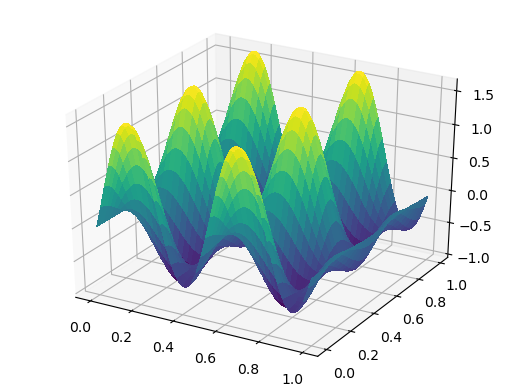

In [7]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plot the surface.
surf = ax.plot_surface(X, Y, Z_sln, cmap = 'viridis', linewidth=0, antialiased=False)

plt.show()

## FFT method to find the numerical sln:

In [8]:
# Get the spatial frequencies / wavenumbers

k_x = np.fft.fftfreq(x.size)/dx
k_y = np.fft.fftfreq(y.size)/dy

print(k_x.size, k_y.size)

256 256


In [9]:
# Create a grid in Fourier space

KX, KY = np.meshgrid(k_x, k_y)

print(KX.shape, KY.shape)

(256, 256) (256, 256)


### Function for f:

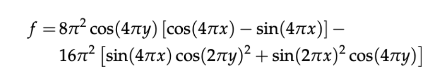

In [10]:
def rhs_function(xx, yy):
    
    rhs = 8*(np.pi**2)*np.cos(4*np.pi*yy)*(np.cos(4*np.pi*xx)\
    - np.sin(4*np.pi*xx)) - 16*(np.pi**2)*(np.sin(4*np.pi*xx)\
    *np.cos(2*np.pi*yy)**2 + (np.sin(2*np.pi*xx)**2)\
    *np.cos(4*np.pi*yy))
    
    return rhs

In [11]:
# Evaluate this in X, Y

f_xy = rhs_function(X, Y)


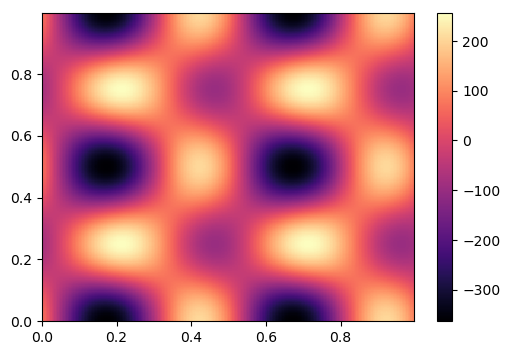

In [12]:
# Figure environment

plt.figure(figsize=(6,4))

A = plt.pcolor(X, Y, f_xy, cmap = 'magma')

plt.colorbar(A)

plt.show()

### FFT of the above image f_xy

In [13]:
# We use numpy functions to do the FFT:

F_kk = np.fft.fft2(f_xy)

print(F_kk)

[[ 1.51796797e-10+0.00000000e+00j  5.54976188e-12-1.31729499e-10j
   4.63466682e-10+2.58725758e+06j ... -5.39373420e-11-2.49038610e-10j
   4.81200053e-10-2.58725758e+06j  5.54976188e-12+1.31729499e-10j]
 [ 3.01183692e-10-1.43918163e-11j -1.57755276e-12-6.46583137e-13j
  -3.00336921e-10-2.79413132e-10j ...  7.19829847e-13-9.46721445e-13j
  -2.71711903e-10+2.80318375e-10j  2.84315997e-13-1.01049806e-12j]
 [-2.58725758e+06+6.79383996e-10j -2.88850294e-10-1.03467035e-10j
   2.58725758e+06+2.58725758e+06j ...  1.20878015e-10-2.22560687e-10j
   2.58725758e+06-2.58725758e+06j -2.87344357e-10+1.03877461e-10j]
 ...
 [-1.88033728e-10-1.47323610e-12j -2.20179072e-12+2.31078295e-12j
   1.57978913e-10+1.65204379e-10j ... -7.63266233e-13-1.23887774e-12j
   1.80306107e-10-1.48524070e-10j -1.40190709e-12+1.48783081e-12j]
 [-2.58725758e+06-6.53008650e-10j -2.87344357e-10-1.03877461e-10j
   2.58725758e+06+2.58725758e+06j ...  1.19890977e-10-2.22110312e-10j
   2.58725758e+06-2.58725758e+06j -2.88850294e-

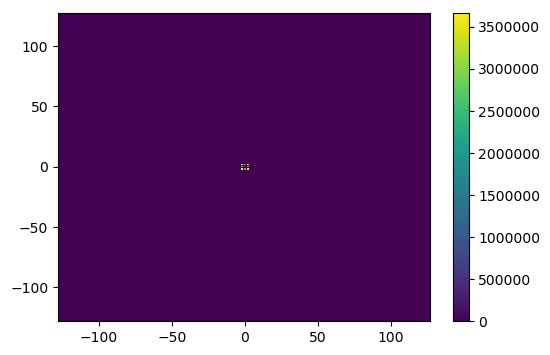

In [14]:
# Figure environment in Fourier space

KXX, KYY = np.meshgrid(sorted(k_x), sorted(k_y))


plt.figure(figsize=(6,4))

A = plt.pcolor(KXX, KYY, np.abs(np.fft.fftshift(F_kk)))

plt.colorbar(A)

plt.show()

## Get Phi_kk based on eq. 9.16

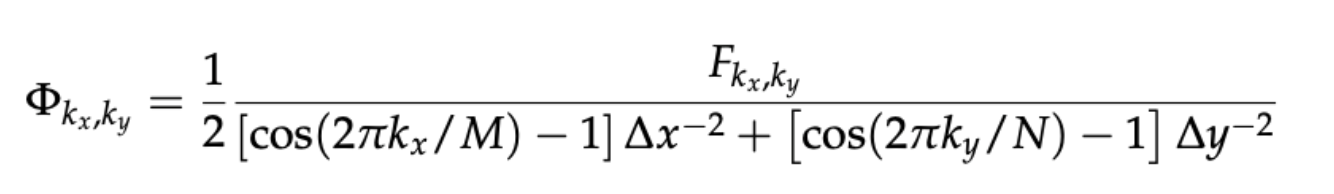

In [15]:
# Function to get Phi_kk in FOurier space

def phi_kk(K_XX, K_YY, F_kk):
    
    # Isolate the 0 frequency
    stamp_cont = F_kk[0,0]
    print(stamp_cont)
    
    # Calculate Phi_kk
    
    phi_kk_function = 0.5*F_kk/((np.cos(2*np.pi*K_XX/Nx) - 1)/dx**2\
    + (np.cos(2*np.pi*K_YY/Ny) - 1)/dy**2)
    
    # Put back the 0 frequency
    phi_kk_function[0, 0] = stamp_cont
    
    return phi_kk_function
    

In [16]:
# iFFT of phi_kk to get phi in real space 

f_sln = np.fft.ifft2(phi_kk(KX, KY, F_kk))

# Return solution in real space
numer_sln = np.real(f_sln)

print(numer_sln)

(1.51796797354109e-10+0j)
[[ 2.04635916e-15  4.96799210e-02  1.00444944e-01 ... -1.41347109e-01
  -9.56287041e-02 -4.84751353e-02]
 [ 2.04681448e-15  4.96496374e-02  1.00382999e-01 ... -1.41265240e-01
  -9.55725600e-02 -4.84463029e-02]
 [ 2.04729621e-15  4.95588595e-02  1.00197312e-01 ... -1.41019829e-01
  -9.54042628e-02 -4.83598752e-02]
 ...
 [ 2.04677050e-15  4.94078060e-02  9.98883299e-02 ... -1.40611468e-01
  -9.51242181e-02 -4.82160603e-02]
 [ 2.04683891e-15  4.95588595e-02  1.00197312e-01 ... -1.41019829e-01
  -9.54042628e-02 -4.83598752e-02]
 [ 2.04644655e-15  4.96496374e-02  1.00382999e-01 ... -1.41265240e-01
  -9.55725600e-02 -4.84463029e-02]]


/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == "":
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == "":


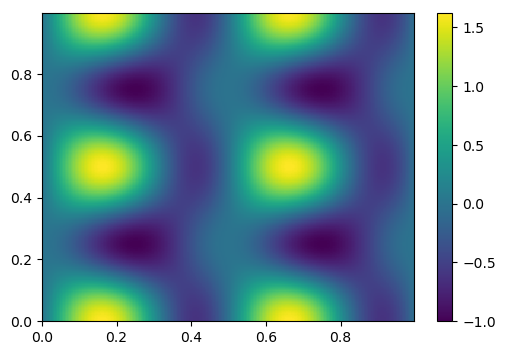

In [17]:
# Figure environment

plt.figure(figsize=(6,4))

A = plt.pcolor(X, Y, numer_sln)

plt.colorbar(A)

plt.show()

### Error analysis:

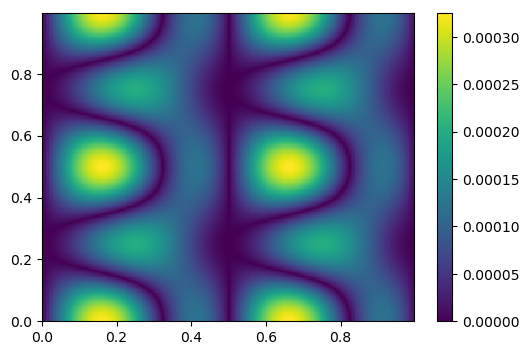

In [18]:
# Absolute error map:

# Figure environment

plt.figure(figsize=(6,4))

A = plt.pcolor(X, Y, np.abs(numer_sln - Z_sln))

plt.colorbar(A)

plt.show()

### L_2 norm error:

In [19]:
# L_2 norm error

#a = np.sum((numer_sln - Z_sln)**2)

L2_error = np.sqrt((np.sum((numer_sln - Z_sln)**2)/(Nx*Ny)))

print(L2_error)

0.00012297774075612435
